In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
import datetime as dt

# make sure the plots are shown in the notebook inline
%matplotlib inline

In [9]:
df = pd.read_csv('Gantt_data.csv')

##### PRE-PROCESSING THE DATA ###### 
#Convert dates to datetime format
df[["Start", "Finish"]] = df[["Start", "Finish"]].apply(pd.to_datetime)

#Add Duration
df['duration']=df.Finish-df.Start
df.duration=df.duration.apply(lambda x: x.days+1)

#sort in ascending order of start date
df=df.sort_values(by='Start', ascending=True)

#project level variables
p_start=df.Start.min()
p_end=df.Finish.max()
p_duration=(p_end-p_start).days+1

#Add relative date
df['rel_start']=df.Start.apply(lambda x: (x-p_start).days)
df

,ID,Task,Start,Finish,Category,duration,rel_start
0,0,Inception,2022-02-09,2022-02-23,UML,15,0
1,1,Elaboration – I,2022-02-17,2022-03-08,UML,20,8
2,2,Elaboration – II,2022-03-04,2022-04-10,UML,38,23
3,3,Construction,2022-03-16,2022-04-20,Coding,36,35
4,4,Transition,2022-04-21,2022-04-27,Coding,7,71
5,5,Authoring,2022-04-28,2022-05-11,Report,14,78
6,6,Correction,2022-05-12,2022-05-19,Report,8,92
7,7,Finalizing,2022-05-20,2022-05-22,All,3,100


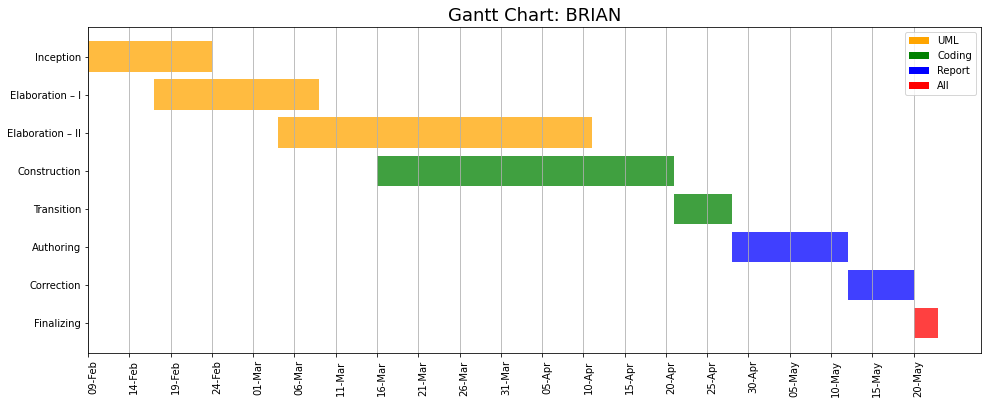

In [10]:
#Create custom x-ticks and x-tick labels
x_ticks=[i for i in range(p_duration+1)]
x_labels=[(p_start+dt.timedelta(days=i)).strftime('%d-%b') 
          for i in x_ticks] 

# colours
c_dict={'UML':'orange', 'Coding':'green', 'Report':'blue', 'All':'red'}


######  PLOTTING GANTT CHART ######
plt.figure(figsize=(16,6))
plt.title('Gantt Chart: BRIAN', size=18)

for i in range(df.shape[0]):
    color=c_dict[df.Category[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.75, 
             color=color)

legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::5], labels=x_labels[::5], rotation=90, ha='right', rotation_mode='anchor')
plt.grid(axis='x');